<a href="https://colab.research.google.com/github/DOOryUniverse/News-articles-through-text-sentiment-analysis/blob/Nvidia/%EC%97%94%EB%B9%84%EB%94%94%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer


In [ ]:
url = 'https://newsapi.org/v2/everything?'
api_key = '9d3a657dc53f43ce9b2641a64b686d48'

In [ ]:

def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

In [ ]:
# Collecting the first 100 articles about ireland to check the API and the working of the function 
parameters_headlines = {
    'q': 'Nvidia',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-03-10'    
}
# making the API call 
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline['articles']
# transforminf the data from JSON dictionary to a pandas data frame
news_articles_df = pd.DataFrame(get_articles(responses))
# printing the head to check the format and the working of the get_articles function
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,"{'id': 'engadget', 'name': 'Engadget'}",Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18T18:06:48Z,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,NVIDIA's latency-reducing tech comes to 'Overw...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}","If you play Overwatchon PC frequently, there's...","If you play Overwatchon PC frequently, there's...",2021-03-12T19:11:42Z,https://www.engadget.com/overwatch-nvidia-refl...,https://s.yimg.com/uu/api/res/1.2/IUu.voK9hHlU...
2,"Apple wants Tim Cook, Tim Sweeney to testify i...",https://www.engadget.com/about/editors/jon-fingas,"{'id': 'engadget', 'name': 'Engadget'}",Apple and Epic have produced witness lists for...,Apple and Epic have drawn up their potential w...,2021-03-20T21:47:54Z,https://www.engadget.com/tim-cook-sweeney-may-...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,AMD Radeon RX 6700 XT review: A curious return...,https://www.engadget.com/about/editors/devindr...,"{'id': 'engadget', 'name': 'Engadget'}",AMD's Radeon RX 6700 XT is a solid new mid-ran...,"In a radical change of pace, AMD aimed for the...",2021-03-17T13:00:05Z,https://www.engadget.com/amd-radeon-rx-6700-xt...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,The best tech deals we found in Best Buy's wee...,https://www.engadget.com/about/editors/engadget,"{'id': 'engadget', 'name': 'Engadget'}",Here's a list of the best tech deals we found ...,Best Buy's kicking off the weekend with anothe...,2021-03-19T12:00:41Z,https://www.engadget.com/best-tech-deals-best-...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
for domain in domains:
    parameters_headlines = {
    'domains':format(domain),
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2021-03-10'    
    }
    rr = requests.get(url, params = parameters_headlines)
    data = rr.json()
    responses = data["articles"]
    news_articles_df=news_articles_df.append(pd.DataFrame(get_articles(responses)))

In [ ]:
print(news_articles_df.shape)
news_articles_df.head()

(2912, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,"{'id': 'engadget', 'name': 'Engadget'}",Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18T18:06:48Z,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,NVIDIA's latency-reducing tech comes to 'Overw...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}","If you play Overwatchon PC frequently, there's...","If you play Overwatchon PC frequently, there's...",2021-03-12T19:11:42Z,https://www.engadget.com/overwatch-nvidia-refl...,https://s.yimg.com/uu/api/res/1.2/IUu.voK9hHlU...
2,"Apple wants Tim Cook, Tim Sweeney to testify i...",https://www.engadget.com/about/editors/jon-fingas,"{'id': 'engadget', 'name': 'Engadget'}",Apple and Epic have produced witness lists for...,Apple and Epic have drawn up their potential w...,2021-03-20T21:47:54Z,https://www.engadget.com/tim-cook-sweeney-may-...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,AMD Radeon RX 6700 XT review: A curious return...,https://www.engadget.com/about/editors/devindr...,"{'id': 'engadget', 'name': 'Engadget'}",AMD's Radeon RX 6700 XT is a solid new mid-ran...,"In a radical change of pace, AMD aimed for the...",2021-03-17T13:00:05Z,https://www.engadget.com/amd-radeon-rx-6700-xt...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,The best tech deals we found in Best Buy's wee...,https://www.engadget.com/about/editors/engadget,"{'id': 'engadget', 'name': 'Engadget'}",Here's a list of the best tech deals we found ...,Best Buy's kicking off the weekend with anothe...,2021-03-19T12:00:41Z,https://www.engadget.com/best-tech-deals-best-...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [ ]:
# this fuincton extracts the source name from the source dictionary as seen above
source_getter(news_articles_df)

In [ ]:
# converted the publication date to date time format for future analysis
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [ ]:
#look for missing data
news_articles_df.isnull().sum()

title            0
author         294
source           0
description      1
content          0
pub_date         0
url              0
photo_url        5
dtype: int64

In [ ]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(2617, 8)


In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str)

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,GeForce Now doubles its price for newcomers to...
1,NVIDIA's latency-reducing tech comes to 'Overw...,Igor Bonifacic,Engadget,"If you play Overwatchon PC frequently, there's...","If you play Overwatchon PC frequently, there's...",2021-03-12,https://www.engadget.com/overwatch-nvidia-refl...,https://s.yimg.com/uu/api/res/1.2/IUu.voK9hHlU...,NVIDIA's latency-reducing tech comes to 'Overw...
2,"Apple wants Tim Cook, Tim Sweeney to testify i...",https://www.engadget.com/about/editors/jon-fingas,Engadget,Apple and Epic have produced witness lists for...,Apple and Epic have drawn up their potential w...,2021-03-20,https://www.engadget.com/tim-cook-sweeney-may-...,https://s.yimg.com/os/creatr-uploaded-images/2...,"Apple wants Tim Cook, Tim Sweeney to testify i..."
3,AMD Radeon RX 6700 XT review: A curious return...,https://www.engadget.com/about/editors/devindr...,Engadget,AMD's Radeon RX 6700 XT is a solid new mid-ran...,"In a radical change of pace, AMD aimed for the...",2021-03-17,https://www.engadget.com/amd-radeon-rx-6700-xt...,https://s.yimg.com/os/creatr-uploaded-images/2...,AMD Radeon RX 6700 XT review: A curious return...
4,The best tech deals we found in Best Buy's wee...,https://www.engadget.com/about/editors/engadget,Engadget,Here's a list of the best tech deals we found ...,Best Buy's kicking off the weekend with anothe...,2021-03-19,https://www.engadget.com/best-tech-deals-best-...,https://s.yimg.com/os/creatr-uploaded-images/2...,The best tech deals we found in Best Buy's wee...


In [ ]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [ ]:

def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])


tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
# applying all of these functions to the our dataframe 
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

NameError: ignored

In [ ]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...
1,NVIDIA's latency-reducing tech comes to 'Overw...,Igor Bonifacic,Engadget,"If you play Overwatchon PC frequently, there's...","If you play Overwatchon PC frequently, there's...",2021-03-12,https://www.engadget.com/overwatch-nvidia-refl...,https://s.yimg.com/uu/api/res/1.2/IUu.voK9hHlU...,nvidia is latency reducing tech comes to overw...,"['nvidia', 'latency', 'reducing', 'tech', 'com...",nvidia latency reducing tech come overwatch pl...
2,"Apple wants Tim Cook, Tim Sweeney to testify i...",https://www.engadget.com/about/editors/jon-fingas,Engadget,Apple and Epic have produced witness lists for...,Apple and Epic have drawn up their potential w...,2021-03-20,https://www.engadget.com/tim-cook-sweeney-may-...,https://s.yimg.com/os/creatr-uploaded-images/2...,apple wants tim cook tim sweeney to testify in...,"['apple', 'wants', 'tim', 'cook', 'tim', 'swee...",apple want tim cook tim sweeney testify epic l...
3,AMD Radeon RX 6700 XT review: A curious return...,https://www.engadget.com/about/editors/devindr...,Engadget,AMD's Radeon RX 6700 XT is a solid new mid-ran...,"In a radical change of pace, AMD aimed for the...",2021-03-17,https://www.engadget.com/amd-radeon-rx-6700-xt...,https://s.yimg.com/os/creatr-uploaded-images/2...,amd radeon rx xt review a curious return to m...,"['amd', 'radeon', 'rx', 'xt', 'review', 'curio...",amd radeon rx xt review curious return mid ran...
4,The best tech deals we found in Best Buy's wee...,https://www.engadget.com/about/editors/engadget,Engadget,Here's a list of the best tech deals we found ...,Best Buy's kicking off the weekend with anothe...,2021-03-19,https://www.engadget.com/best-tech-deals-best-...,https://s.yimg.com/os/creatr-uploaded-images/2...,the best tech deals we found in best buy is we...,"['best', 'tech', 'deals', 'found', 'best', 'bu...",best tech deal found best buy weekend sale bes...


In [ ]:
news_articles_df.head()
news_articles_df.to_csv('/content/drive/MyDrive/news_articles_nvidia.csv', index = False)

In [ ]:
news_articles_df = pd.read_csv('/content/drive/MyDrive/news_articles_nvidia.csv')

In [ ]:
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(2596, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [ ]:

headlines_polarity.head()

,neg,neu,pos,compound,headline,source,label,word_count
0,0.000,1.000,0.000,0.0000,geforce double price newcomer month nvidia dou...,Engadget,0,29
1,0.065,0.599,0.335,0.8360,nvidia latency reducing tech come overwatch pl...,Engadget,1,30
2,0.190,0.717,0.093,-0.4767,apple want tim cook tim sweeney testify epic l...,Engadget,-1,28
3,0.000,0.721,0.279,0.8910,amd radeon rx xt review curious return mid ran...,Engadget,1,34
4,0.048,0.529,0.423,0.9422,best tech deal found best buy weekend sale bes...,Engadget,1,27


In [ ]:
#headlines_polarity.label.value_counts()
#headlines_polarity.groupby('source').label.value_counts()
# Grouping the news articles by their source and calculating their mean polarity  
gk = headlines_polarity.groupby(['source', 'label']) 
fk= headlines_polarity.groupby('source')['compound'].mean()
fk = fk.to_frame()
fk.to_csv('/content/drive/MyDrive/mean_polarity_nvidia.csv', index = 'source')

In [ ]:
# libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py

import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

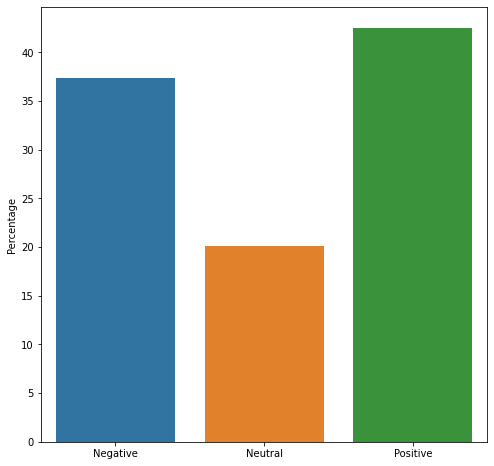

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [ ]:
headlines_polarity['compound'].iplot(
    kind='hist',
    bins=30,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Text(0.5, 0, ' Mean Polarity')

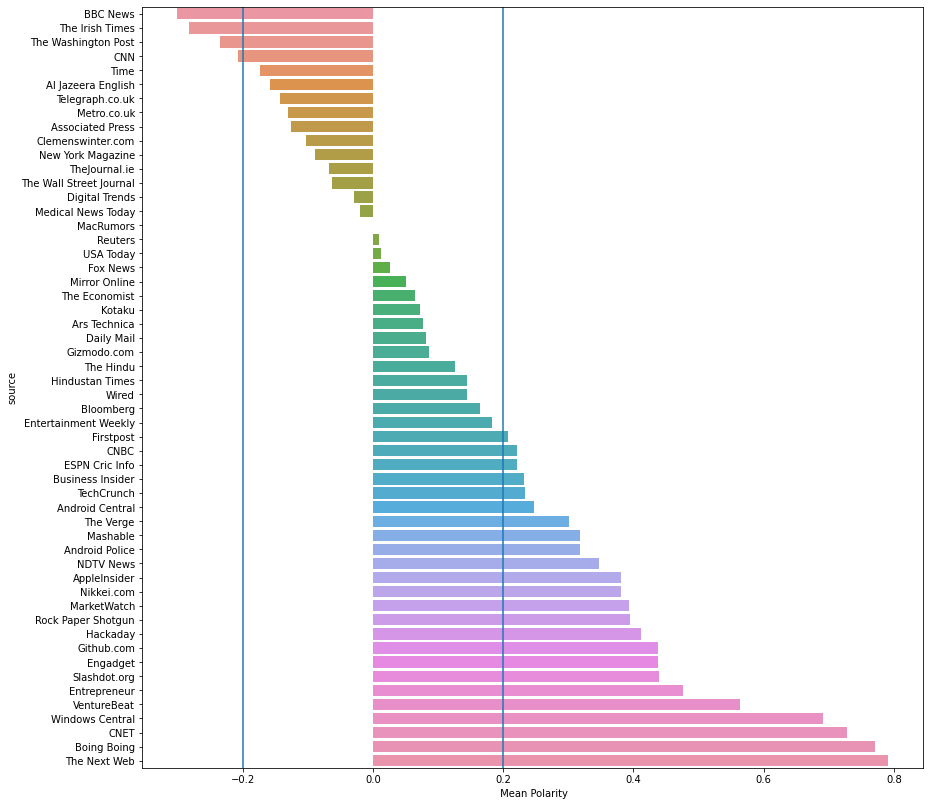

In [ ]:
# Checking out the distribution of the news polarity based on the source of news
df_polarity = pd.read_csv('/content/drive/MyDrive/mean_polarity_nvidia.csv')
df_polarity = df_polarity.sort_values(['compound']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.barplot(x='compound', y='source', data=df_polarity)
ax.set_xlabel(' Mean Polarity')
ax.axvline(0.2)
ax.axvline(-0.2)

In [ ]:
# Box Plot for the top news publishers
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['compound']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['compound']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['compound']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['compound']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['compound']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['compound']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Popular News publishers"
)
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Popular News publishers")

In [ ]:
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['word_count']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['word_count']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['word_count']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['word_count']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['word_count']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Headline Length Boxplot of Popular News publishers"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Headline Length Boxplot of Popular News publishers")

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)  
    return tokens

<class 'list'>


In [ ]:
# Positive headlines and its distribution 
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Positive)')

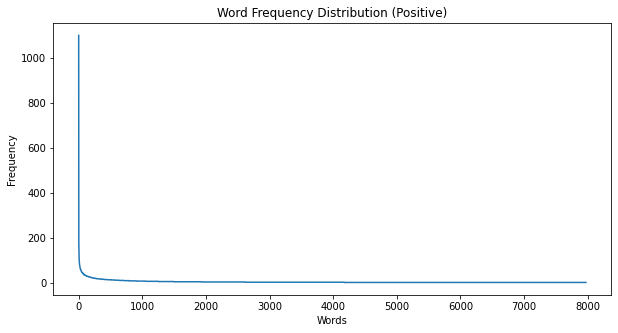

In [ ]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Negative)')

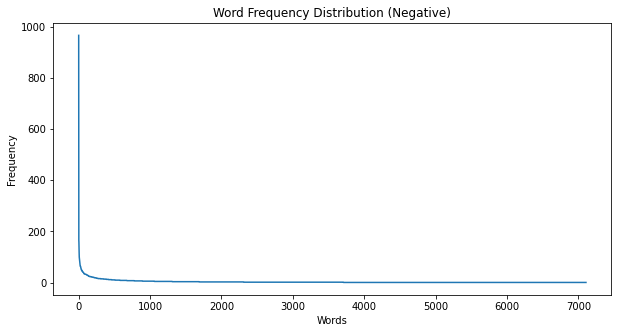

In [ ]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1499.5, 1199.5, -0.5)

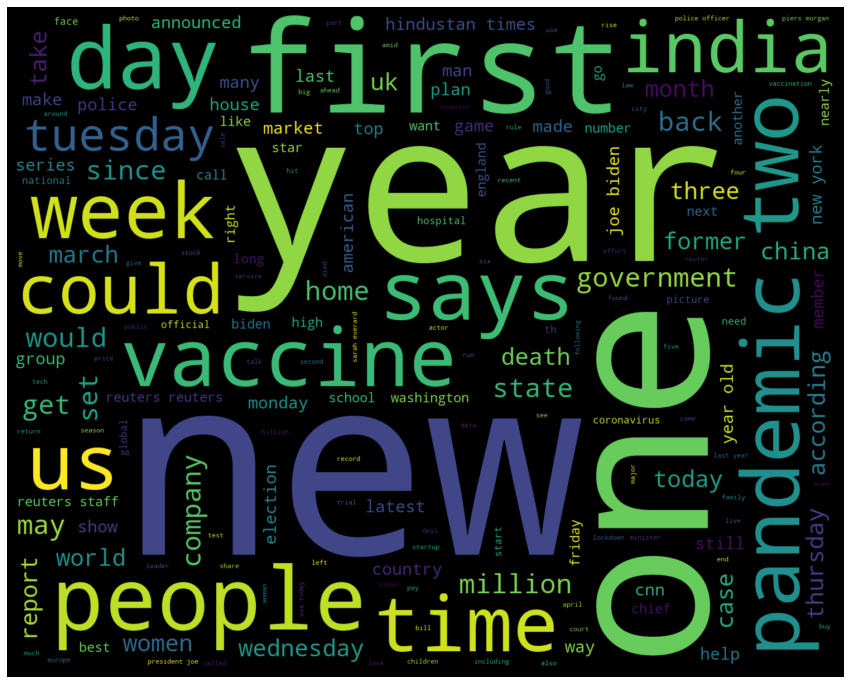

In [ ]:
data=news_articles_df
stop = ["https", "co", "char","chars","said", "say","covid"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
news_articles_df = pd.read_csv('/content/drive/MyDrive/news_articles_nvidia.csv')

In [ ]:
# Checking the combined data once again to ensure no null value is present
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64
(2596, 11)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
dtype: int64


In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polaritys = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polaritys['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polaritys['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polaritys.loc[headlines_polaritys['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polaritys.loc[headlines_polaritys['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polaritys['word_count'] = headlines_polaritys['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
headlines_polaritys.head()

,neg,neu,pos,compound,headline,source,label,word_count
0,0.000,1.000,0.000,0.0000,geforce double price newcomer month nvidia dou...,Engadget,0,29
1,0.065,0.599,0.335,0.8360,nvidia latency reducing tech come overwatch pl...,Engadget,1,30
2,0.190,0.717,0.093,-0.4767,apple want tim cook tim sweeney testify epic l...,Engadget,-1,28
3,0.000,0.721,0.279,0.8910,amd radeon rx xt review curious return mid ran...,Engadget,1,34
4,0.048,0.529,0.423,0.9422,best tech deal found best buy weekend sale bes...,Engadget,1,27


In [ ]:
df_merged=news_articles_df.merge(headlines_polaritys)
df_merged.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,neg,neu,pos,compound,headline,label,word_count
0,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...,0.000,1.000,0.000,0.0000,geforce double price newcomer month nvidia dou...,0,29
1,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...,0.065,0.599,0.335,0.8360,nvidia latency reducing tech come overwatch pl...,1,30
2,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...,0.190,0.717,0.093,-0.4767,apple want tim cook tim sweeney testify epic l...,-1,28
3,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...,0.000,0.721,0.279,0.8910,amd radeon rx xt review curious return mid ran...,1,34
4,GeForce Now doubles its price for newcomers to...,https://www.engadget.com/about/editors/kris-holt,Engadget,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,2021-03-18,https://www.engadget.com/nvidia-geforce-nows-p...,https://s.yimg.com/os/creatr-uploaded-images/2...,geforce now doubles its price for newcomers to...,"['geforce', 'doubles', 'price', 'newcomers', '...",geforce double price newcomer month nvidia dou...,0.048,0.529,0.423,0.9422,best tech deal found best buy weekend sale bes...,1,27


In [ ]:
data=headlines_polaritys
stop = ["https", "co", "char","chars","said", "say","covid"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['headline']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: ignored

In [ ]:
stock_data = pd.read_csv('/content/drive/MyDrive/stknvda.csv')

In [ ]:
# stock news articles
df_merged['date'] = pd.to_datetime(df_merged['pub_date']).apply(lambda x: x.date())
# stock market data 
stock_data['date'] = pd.to_datetime(stock_data['day']).apply(lambda x: x.date())

In [ ]:
df_mergeds=stock_data.merge(df_merged,on='date')
df_mergeds.head()

,open,high,low,close,volume,adjusted,day,company,date,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,neg,neu,pos,compound,headline,label,word_count
0,513.619995,519.200012,498.299988,498.730011,9599800,498.730011,2021-03-10,NVDA,2021-03-10,Via buys mapping startup Remix for $100 million,Kirsten Korosec,TechCrunch,"Remix, the startup that developed mapping soft...","Remix, the startup that developed mapping soft...",2021-03-10,http://techcrunch.com/2021/03/09/via-buys-mapp...,https://techcrunch.com/wp-content/uploads/2021...,via buys mapping startup remix for million re...,"['via', 'buys', 'mapping', 'startup', 'remix',...",via buy mapping startup remix million remix st...,0.07,0.751,0.180,0.4767,automaker supplier startup see growing market ...,1,32
1,513.619995,519.200012,498.299988,498.730011,9599800,498.730011,2021-03-10,NVDA,2021-03-10,Via buys mapping startup Remix for $100 million,Kirsten Korosec,TechCrunch,"Remix, the startup that developed mapping soft...","Remix, the startup that developed mapping soft...",2021-03-10,http://techcrunch.com/2021/03/09/via-buys-mapp...,https://techcrunch.com/wp-content/uploads/2021...,via buys mapping startup remix for million re...,"['via', 'buys', 'mapping', 'startup', 'remix',...",via buy mapping startup remix million remix st...,0.00,0.726,0.274,0.8074,global inequity venture financing staggering g...,1,25
2,513.619995,519.200012,498.299988,498.730011,9599800,498.730011,2021-03-10,NVDA,2021-03-10,Via buys mapping startup Remix for $100 million,Kirsten Korosec,TechCrunch,"Remix, the startup that developed mapping soft...","Remix, the startup that developed mapping soft...",2021-03-10,http://techcrunch.com/2021/03/09/via-buys-mapp...,https://techcrunch.com/wp-content/uploads/2021...,via buys mapping startup remix for million re...,"['via', 'buys', 'mapping', 'startup', 'remix',...",via buy mapping startup remix million remix st...,0.00,0.919,0.081,0.4404,google family link update reflect pandemic imp...,1,34
3,513.619995,519.200012,498.299988,498.730011,9599800,498.730011,2021-03-10,NVDA,2021-03-10,Via buys mapping startup Remix for $100 million,Kirsten Korosec,TechCrunch,"Remix, the startup that developed mapping soft...","Remix, the startup that developed mapping soft...",2021-03-10,http://techcrunch.com/2021/03/09/via-buys-mapp...,https://techcrunch.com/wp-content/uploads/2021...,via buys mapping startup remix for million re...,"['via', 'buys', 'mapping', 'startup', 'remix',...",via buy mapping startup remix million remix st...,0.00,1.000,0.000,0.0000,investor clara brenner quin garcia rachel holt...,0,30
4,513.619995,519.200012,498.299988,498.730011,9599800,498.730011,2021-03-10,NVDA,2021-03-10,Via buys mapping startup Remix for $100 million,Kirsten Korosec,TechCrunch,"Remix, the startup that developed mapping soft...","Remix, the startup that developed mapping soft...",2021-03-10,http://techcrunch.com/2021/03/09/via-buys-mapp...,https://techcrunch.com/wp-content/uploads/2021...,via buys mapping startup remix for million re...,"['via', 'buys', 'mapping', 'startup', 'remix',...",via buy mapping startup remix million remix st...,0.45,0.550,0.000,-0.9325,hacker exploiting vulnerable exchange server d...,-1,30


In [ ]:
df_mergeds['combined_text'] = df_mergeds['title'].map(str) +" "+ df_mergeds['content']+" "+ df_mergeds['description'].map(str)

In [ ]:
# keeping only the essential columns in the dataframe
df_mergeds=df_mergeds[['date','close','neg','neu','pos','compound']]
df_mergeds.head()

,date,close,neg,neu,pos,compound
0,2021-03-10,498.730011,0.07,0.751,0.180,0.4767
1,2021-03-10,498.730011,0.00,0.726,0.274,0.8074
2,2021-03-10,498.730011,0.00,0.919,0.081,0.4404
3,2021-03-10,498.730011,0.00,1.000,0.000,0.0000
4,2021-03-10,498.730011,0.45,0.550,0.000,-0.9325


In [ ]:
df_mergeds.to_csv('/content/drive/MyDrive/df_mergeds_nvidia.csv', index = False)

In [ ]:
df_mergeds=df_mergeds.drop_duplicates(subset='date', keep="last")
df_mergeds.head()

,date,close,neg,neu,pos,compound
11136,2021-03-10,498.730011,0.091,0.767,0.142,0.1779
19378,2021-03-11,519.739990,0.085,0.826,0.088,0.0258
32067,2021-03-12,514.239990,0.091,0.767,0.142,0.1779
38676,2021-03-15,527.650024,0.085,0.826,0.088,0.0258
65551,2021-03-16,531.650024,0.091,0.767,0.142,0.1779


In [ ]:
df_mergeds.to_csv('/content/drive/MyDrive/nvidia.csv', index = False)

In [ ]:
# Min-Max Normalization 
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df_mergeds[['close']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# adding the new column to our dataframe
df_mergeds['normal_close']= x_scaled

Text(0, 0.5, 'Normalized stock close')

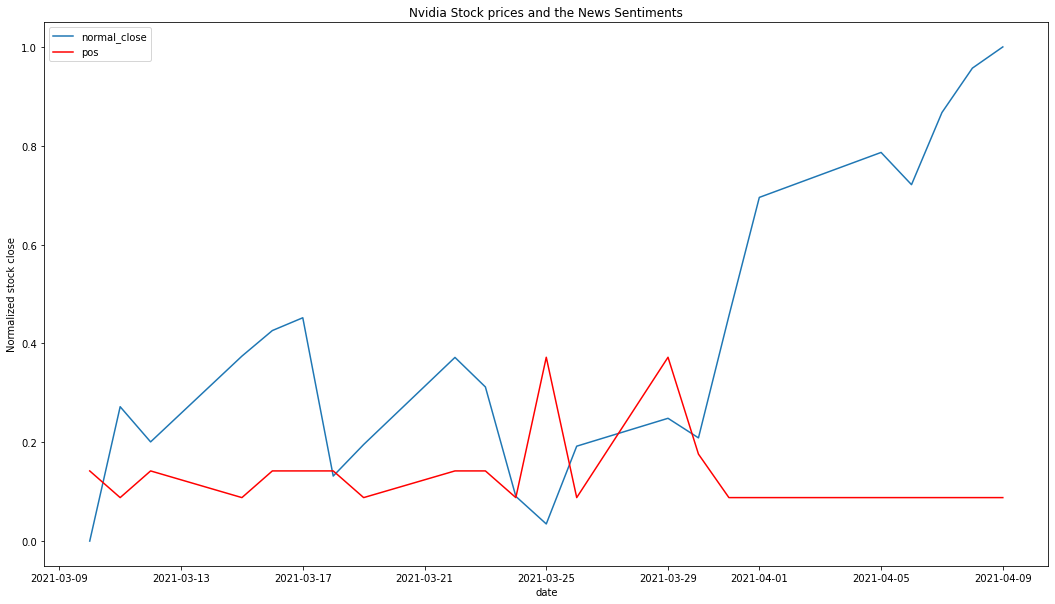

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# gca stands for 'get current axis'
ax = plt.gca()
df_mergeds.plot(kind='line',x='date',y='normal_close',ax=ax, figsize=(18,10))
ax.set_ylabel("Normalized stock close")
df_mergeds.plot(kind='line',x='date',y='pos', color='red',title='Nvidia Stock prices and the News Sentiments', ax=ax, figsize=(18,10))
#plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# calculate the Pearsons and Spearmans correlation between two variables
# prepare data
data1 = df_mergeds['pos']  
data2 = df_mergeds['normal_close'] 
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
# calculate Spearmans's correlation (non gaussian distribution)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: -0.428
Spearmans correlation: -0.483
